# 3. Some Simple Numerical Programs
## 3.1 Exhaustive Enumeration
The code below prints the integer cube root, if it exists, of an integer. If the input is not a perfect cube, it prints a message to that effect. 

In [ ]:
#find the cube root of a perfect cube
x = int(input('Enter an integer: '))
ans = 0
while ans**3 < abs(x):
    ans = ans + 1
if ans**3 != abs(x):
    print(x,'is not a perfect cube')
else:
    if x < 0:
        ans= -ans
    print ('Cube root of',x,'is',ans)

How the program runs? 
- The value of the expression `ans**3` starts at 0, and gets larger each step
- When it reaches or exceeds `abs(x)`, the loop terminates
- Since `abs(x)` is always positive, there are only a finite number of iterations before the loop must terminate.

When writing a loop, we need to think about an appropriate **decrementing function**. This is a function that has the following properties:
- It maps a set of program variables into an integer.
- When the loop is entered, its value is non-negative
- When its value is <= 0, the loop terminates
- Its value is decreased every time through the loop

The *algorithmic technique* used in this program is a variance of **guess and check** called **exhaustive enumeration**.
- pratical way to solve problem
- easy to implement
- easy to understand

## 3.2 For Loops

In [ ]:
x=4
for j in range(x):
    for i in range(x):
        print(i)
        x = 2

Notice how the output changes. This is because the `range` function in *outer loop* is evaluated only once, but the `range` function in the *inner loop* is evaluated each time the inner `for` statement is reached.

## 3.3 Approximate Solutions and Bisection Search
E.g Finds the square root of 2 using exhaustive enumeration.<br>

In [ ]:
def sqrt_root(x):
    epsilon=0.01
    step=epsilon**2
    #number of guesses
    numGuesses=0
    ans=0.0

    while abs(ans**2 -x) >= epsilon and ans <=x:
        ans += step
        numGuesses+=1
    print ('number of guesses made: ',numGuesses)

    if abs(ans**2 -x) >= epsilon:
        print  ('Failed to find square root of ',x)
    else:
        print (ans,' is close to square root of ',x)

In [ ]:
sqrt_root(5)

In [ ]:
sqrt_root(0.25)

Note that exhaustive enumeration is a search technique that works only if the set of values being searched includes the answer. 

In [ ]:
sqrt_root(123456)

### Bisection Search

In [ ]:
def bi_sqrt_root(x):
    epsilon=0.01
    numGuesses=0
    low=0.0
    high=max(1.0,x)
    ans = (high+low)/2.0
    while abs(ans**2 -x) >= epsilon:
        print ('low=',low,'high=',high,'ans=',ans)
        numGuesses+=1
        if ans**2 <x:
            low=ans
        else:
            high=ans
        ans=(high+low)/2.0
    print ('number of guesses made:',numGuesses)
    print (ans,'is close to square root of',x)

In [ ]:
bi_sqrt_root(5)

In [ ]:
bi_sqrt_root(123456)

Notice that using bisection is much faster comapred to exhaustive search because it divides the search space **in half at each step**. It reduced the search space by only a small amount at each iteration.

# 4 Functions, scoping and abstraction

In [4]:
def f(x):
    def g():
        x='abc'
        print ('x=',x)
    def h():
        z = x
        print ('z=',z)
    x +=1
    print ('x=',x)
    h()
    g()
    print ('x=',x)
    return g

x=3
z=f(x)
print ('x=',x)
print ('z=',z)
z()

x= 4
z= 4
x= abc
x= 4
x= 3
z= <function f.<locals>.g at 0x000001F1FDB2A9D8>
x= abc


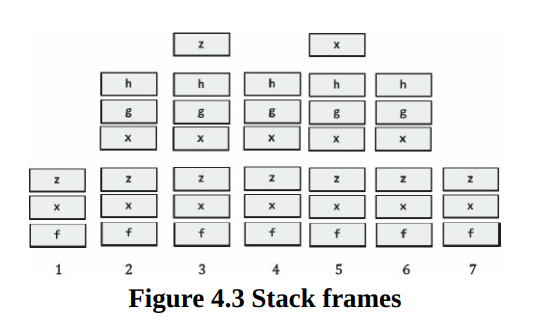
Execution sequence:
- `z=f(x)` is first evaluated by invoking function f with value `x=3`.When f is entered, a stack frame is created as shown in column2. The names in the stack frame are `x` (the formal parameters), `g` and `h`. The varaibles `g` and `h` are bound to objects of type `function`.The properties of these functions are given by the function definitions within `f`.
- When `h` is invoked from within `f`, another stack frame is created as shown in column3, contains only the local variable `z`.When `h` returns, the stack frame asscoaited with the invocation of `h` goes away as shown in column4. 
- Next, `g` is invoked, and a stack frame containing `g`'s local variable `x` is added.

In [ ]:
z()

In [ ]:
x

In [2]:
def f(x):
    def g():
        x='abcdefg'
        print ('x=',x)
    def h():
        z = x
        print ('z=',z)
    x +=1
    print ('x=',x)
    h()
    g()
    print ('x=',x)
    return g

x=3
z=f(x)
print ('x=',x)
print ('z=',z)
z()

x= 4
z= 4
x= abcdefg
x= 4
x= 3
z= <function f.<locals>.g at 0x000001F1FD700B70>
x= abcdefg


In [3]:
z()

x= abcdefg


In [5]:
z

<function __main__.f.<locals>.g()>

## 4.2 Specifications

In [1]:
def findRoot(x,power,epsilon):
    """Assumes x and epsilon int or float, power an int, 
        epsilon >=0 and power >=1
        Returns float y such that y**power is within epsilon of x.
        If such a float does not exist, it returns None"""
    if x < 0 and power%2 ==0: #negative number has no even-powered roots
        
        return None
    low=min(-1.0,x)
    high=max(1.0,x)
    ans = (high+low)/2.0
    while abs(ans**power -x) >= epsilon:
        if ans**power <x:
            low=ans
        else:
            high=ans
        ans = (high +low)/2.0
    return ans

def testFindRoot():
    epsilon=0.0001
    for x in [0.25,-0.25,2,-2,8,-8]:
        for power in range(1,4):
            print ('Testing x=',str(x),'and power= ',power)
            result=findRoot(x,power,epsilon)
            if result==None:
                print (' No root')
            else:
                print (' ',result**power,'~=', x)

In [2]:
help(findRoot)

Help on function findRoot in module __main__:

findRoot(x, power, epsilon)
    Assumes x and epsilon int or float, power an int, 
    epsilon >=0 and power >=1
    Returns float y such that y**power is within epsilon of x.
    If such a float does not exist, it returns None



A **specification** of a function defines a contract between the implementer of a function and those who will be writing programs that use the function.The users of a function are **clients**.This contract can be thought of as containing two parts:
- **Assumptions**: These describe conditions that must be met by clients of the function. They specify the acceptable set of types for each parameters, and some constraints on the value of one or more of the parameters. 
- **Guarantees**: These describe conditions that must be met by the function, provided that it has been called in a way that satisfied the assumption. 

## 4.3 Recursion
World's simplest recursive definition is the factorial function. 

In [3]:
#interative implementation
def factI(n):
    """ Assumes n an int>0
        Returns n!"""
    result = 1
    while n>1:
        result *=n
        n-=1
    return result

In [4]:
#recursive implementation
def factR(n):
    """ Assumes n an int > 0
        Returns n!"""
    if n ==1:
        return n
    else:
        return n*factR(n-1)

In [5]:
print (factI(5),factR(5))

120 120


In [19]:
#visualization of factorial
def factorial(n):
    print ('factorial has been called with n= '+str(n))
    if n==1:
        return 1
    else:
        result=n*factorial(n-1)
        print ('intermediate result for',n,'* factorial(',n-1,'): ',result)
        return result

In [20]:
factorial(5)

factorial has been called with n= 5
factorial has been called with n= 4
factorial has been called with n= 3
factorial has been called with n= 2
factorial has been called with n= 1
intermediate result for 2 * factorial( 1 ):  2
intermediate result for 3 * factorial( 2 ):  6
intermediate result for 4 * factorial( 3 ):  24
intermediate result for 5 * factorial( 4 ):  120


120

### 4.3.1 Fibonacci Numbers
- It has two base cases
- In the recursive case,there are two recursive calls

In [39]:
def fib(n):
    """ Assumes n int>=0 
        Returns Fibonacci of n"""
    if n==0:
        return 0
    elif n==1:
        return 1     
    else:
        return fib(n-1) + fib(n-2)

In [40]:
fib(5)

5

Execution procedures: (all decomposed into base case)
step1: <br>fib(5) = fib(4) + fib(3) <br>
step2: <br>fib(4)=fib(3) + fib(2) <br> fib(3)=fib(2) + fib(1)<br>
step3: <br>
fib(3)=fib(2) + fib(1)<br>
fib(2)=fib(1) + fib(0)<br>
fib(2)=fib(1) + fib(0)<br>
fib(1)=fib(0)<br>
step4:<br>fib(2) = fib(1) + fib(0)<br>
In the end, it is decomposed into base case containing:<br>
fib(1) + fib(0) + fib(1) + fib(0) + fib(1) + fib(0) + fib(0) = 5

### Pitfalls of recursion 
https://www.python-course.eu/python3_recursive_functions.php

In [41]:
#iterative solution
def fibi(n):
    old, new = 0, 1
    if n == 0:
        return 0
    for i in range(n-1):
        old, new = new, old + new
    return new

In [42]:
fibi(5)

5

In [43]:
#we can implement a 'memory' for recursive version 
#by using a dictionary to save the previously calcualted values
memo={0:0,1:1}
def fibm(n):
    if not n in memo:
        memo[n]=fibm(n-1) + fibm(n-2)
        print (memo[n],'=',fibm(n-1),'+',fibm(n-2))
    return memo[n]

In [44]:
fibm(5)

1 = 1 + 0
2 = 1 + 1
3 = 2 + 1
5 = 3 + 2


5

In [46]:
from timeit import Timer

t1 = Timer("fib(10)","from fib import fib")

for i in range(1,41):
	s = "fib(" + str(i) + ")"
	t1 = Timer(s,"from fib import fib")
	time1 = t1.timeit(3)
	s = "fibi(" + str(i) + ")"
	t2 = Timer(s,"from fib import fibi")
	time2 = t2.timeit(3)
	print("n=%2d, fib: %8.6f, fibi:  %7.6f, percent: %10.2f" % (i, time1, time2, time1/time2))

n= 1, fib: 0.000002, fibi:  0.000004, percent:       0.55
n= 2, fib: 0.000004, fibi:  0.000005, percent:       0.85
n= 3, fib: 0.000005, fibi:  0.000004, percent:       1.36
n= 4, fib: 0.000005, fibi:  0.000003, percent:       1.63
n= 5, fib: 0.000008, fibi:  0.000004, percent:       2.10
n= 6, fib: 0.000011, fibi:  0.000003, percent:       3.33
n= 7, fib: 0.000017, fibi:  0.000005, percent:       3.54
n= 8, fib: 0.000044, fibi:  0.000006, percent:       7.56
n= 9, fib: 0.000076, fibi:  0.000006, percent:      13.00
n=10, fib: 0.000142, fibi:  0.000007, percent:      19.45
n=11, fib: 0.000218, fibi:  0.000007, percent:      31.42
n=12, fib: 0.000361, fibi:  0.000006, percent:      61.93
n=13, fib: 0.000670, fibi:  0.000020, percent:      34.00
n=14, fib: 0.000536, fibi:  0.000005, percent:     113.09
n=15, fib: 0.001044, fibi:  0.000005, percent:     204.48
n=16, fib: 0.002014, fibi:  0.000009, percent:     220.92
n=17, fib: 0.003346, fibi:  0.000009, percent:     367.03
n=18, fib: 0.0

### 4.3.2 Palindromes
Recursion is useful for many problems that do not invovle numbers. The function `isPalindrome` contains two internal **helper functions**.

In [8]:
def isPalindrome(s):
    """ Assume s is a str
        Returns True if leters in s form a palindrome; 
        False otherwise.
        Non-letters and capitalization are ignored."""
    
    def toChars(s):
        s=s.lower()
        letters = ''
        for c in s:
            if c in 'abcdefghijklmnopqrstuvwxyz':
                letters +=c
        return letters
    
    def isPal(s):
        if len(s) <=1:
            return True
        else:
            return s[0] ==s[-1] and isPal(s[1:-1])
        
    return isPal(toChars(s))

In [9]:
isPalindrome('abdba')

True

The helper function `isPal` uses recursion to do the real work. <br>
The two base cases are strings of length zero or one.This means that the recursive part of the implementation is reached only on strings of length two or more.<br>
This implementation of `isPalindrome` is an example of an important problem-solving principle known as **divide-and-conquer**.

In [14]:
#added more verbose to visualize how it works
def isPalindrome(s):
    """ Assume s is a str
        Returns True if leters in s form a palindrome; 
        False otherwise.
        Non-letters and capitalization are ignored."""
    
    def toChars(s):
        s=s.lower()
        letters = ''
        for c in s:
            if c in 'abcdefghijklmnopqrstuvwxyz':
                letters +=c
        return letters
    
    def isPal(s):
        print (' isPal called with',s)
        if len(s) <=1:
            print (' About to return True from base case')
            return True
        else:
            answer=s[0]==s[-1] and isPal(s[1:-1])
            print(' About to return',answer,'for',s)
            return answer
        
    return isPal(toChars(s))

In [15]:
def testIsPalindrome(s):
    print ('Try ',s)
    print (isPalindrome(s))

In [16]:
testIsPalindrome('dogGod')

Try  dogGod
 isPal called with doggod
 isPal called with oggo
 isPal called with gg
 isPal called with 
 About to return True from base case
 About to return True for gg
 About to return True for oggo
 About to return True for doggod
True


# 5 Structured types, mutability, and higher-order functions

In [48]:
type((1))

int

In [49]:
type((1,))

tuple

Note that for singleton tuple, need to write `(n,)`

In [50]:
#repetition can be used
3*('a',2)

('a', 2, 'a', 2, 'a', 2)

## 5.3 Lists
Lists are **mutable**. Tuples and strings are **immutable**.<br>
In Python a variable is merely a name, a label that can be attached to an object.

In [51]:
Techs = ['MIT', 'Caltech']
Ivys = ['Harvard', 'Yale', 'Brown']
Univs = [Techs, Ivys]
Univs1 = [['MIT', 'Caltech'],['Harvard', 'Yale', 'Brown']]

In [52]:
print ('Univs=',Univs)

Univs= [['MIT', 'Caltech'], ['Harvard', 'Yale', 'Brown']]


In [53]:
print('Univs1 =',Univs1)

Univs1 = [['MIT', 'Caltech'], ['Harvard', 'Yale', 'Brown']]


In [54]:
print (Univs==Univs1)

True


**However,`Univs` and `Univs1` are actually bound to different objects**<br>
Use built-in Python function `id`, which returns a unique integer identifier for an object. This function allows us to test for `object equality`.

In [55]:
print (id(Univs),id(Univs1))

2493428781768 2493428782472


In [56]:
print (id(Univs)==id(Univs1))

False


In [57]:
type(id(Univs))

int

Similarly, the elements of `Univs` and `Univs1` are also different objects.

In [58]:
print (id(Univs[0]), id(Univs[1]))

2493428781640 2493427342024


In [59]:
print (id(Univs1[0]),id(Univs1[1]))

2493428019144 2493428781960


This is important because `lists` are **mutable**

In [60]:
Techs.append('RPI')

In [64]:
Techs

['MIT', 'Caltech', 'RPI']

In [61]:
Univs

[['MIT', 'Caltech', 'RPI'], ['Harvard', 'Yale', 'Brown']]

In [62]:
Univs1

[['MIT', 'Caltech'], ['Harvard', 'Yale', 'Brown']]

#### Aliasing
There are two **distinct** paths to the same list object. 
- One path is through the variable `Techs` and 
- the other through the first element of the `list` object to which `Univs` is bound

In [65]:
L1=[1,2,3]
L2=[4,5,6]

In [66]:
L3=L1+L2

In [67]:
L3

[1, 2, 3, 4, 5, 6]

In [68]:
#the strucutre is maintained
L1.append(L2)

In [69]:
L1

[1, 2, 3, [4, 5, 6]]

In [70]:
L1=[1,2,3]
#do not maintain the strucutre
#add the elements in
L1.extend(L2)

In [71]:
L1

[1, 2, 3, 4, 5, 6]

## 5.4 Functions as objects

In [72]:
#built in higher-order function map
L1=[1,28,36]
L2=[2,30,9]
for i in map(min,L1,L2):
    print (i)

1
28
9


Python support the creation of anonymous functions (functions that are not bound to a name), using `lambda`

In [73]:
L=[]
for i in map(lambda x,y:x**y, [1,2,3,4],[3,2,1,0]):
    L.append(i)
print (L)

[1, 4, 3, 1]
